In [512]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [557]:
import numpy as np
import skimage.io as io

import matplotlib
%matplotlib inline

import utils, morph, my_types

In [558]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [559]:
# matplotlib.use("TkAgg")
# matplotlib.use("Tk")
# matplotlib.interactive(True)

# Alignment

In [516]:
%matplotlib tk
if not Path("input/me_align.pkl").exists():
    me_align_pts = utils.pick_points("input/me_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(me_align_pts, "input/me_align.pkl")
me_align_pts = utils.load_points("input/me_align.pkl")

if not Path("input/iu_align.pkl").exists():
    iu_align_pts = utils.pick_points("input/iu_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(iu_align_pts, "input/iu_align.pkl")
iu_align_pts = utils.load_points("input/iu_align.pkl")

In [517]:
%matplotlib inline

In [518]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

In [519]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

(575, 547, 3)

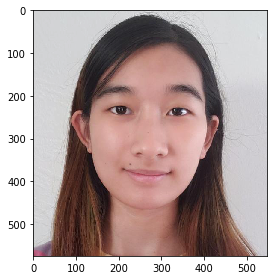

In [520]:
me = utils.to_img_arr("input/me.jpg")
io.imshow(me)
me.shape

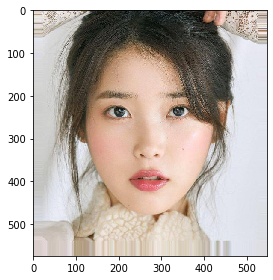

In [521]:
iu = utils.to_img_arr("input/iu.jpg")
io.imshow(iu)

# Define Correspondences

In [522]:
NUM_POINTS = 59

In [523]:
%matplotlib tk
if not Path("input/me.pkl").exists():
    me_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me.pkl")
me_pts = utils.load_points("input/me.pkl")
assert len(me_pts) == NUM_POINTS + 4, len(me_pts)

In [524]:
%matplotlib tk
if not Path("input/iu.pkl").exists():
    iu_pts = utils.pick_points("input/iu.jpg", NUM_POINTS)
    utils.save_points(iu_pts, "input/iu.pkl")
iu_pts = utils.load_points("input/iu.pkl")
assert len(iu_pts) == NUM_POINTS + 4, len(iu_pts)

# Compute Morphing

## Me and IU

In [525]:
%matplotlib inline

(575, 547, 3)

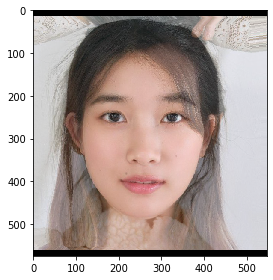

In [526]:
import morph
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, iu, me_pts, iu_pts, alpha=0.5)
io.imshow(middle_img)
middle_img.shape

(575, 547, 3)

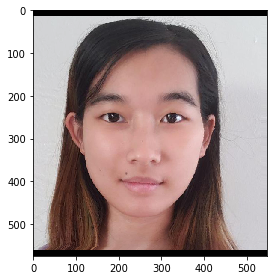

In [527]:
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
io.imshow(me_warped)
me_warped.shape

In [528]:
iu_warped = morph.warp_img(iu, iu_pts, mid_pts, triangulation)

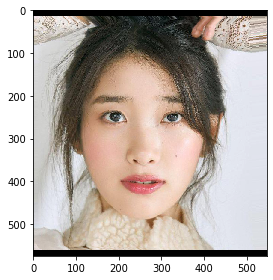

In [529]:
io.imshow(iu_warped)

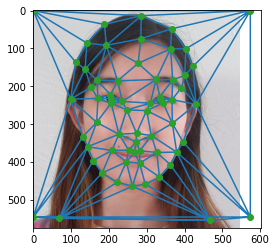

In [530]:
morph.plot_tri_mesh(me, me_pts, triangulation)

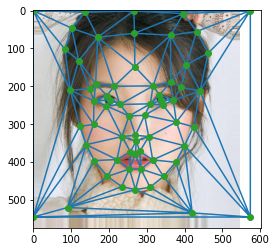

In [531]:
morph.plot_tri_mesh(iu, iu_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.6958956718444824
Frame 2 morph time with alpha 0.05263157894736842: 0.6805210113525391
Frame 3 morph time with alpha 0.10526315789473684: 0.6953871250152588
Frame 4 morph time with alpha 0.15789473684210525: 0.6955647468566895
Frame 5 morph time with alpha 0.21052631578947367: 0.6868717670440674


KeyboardInterrupt: 

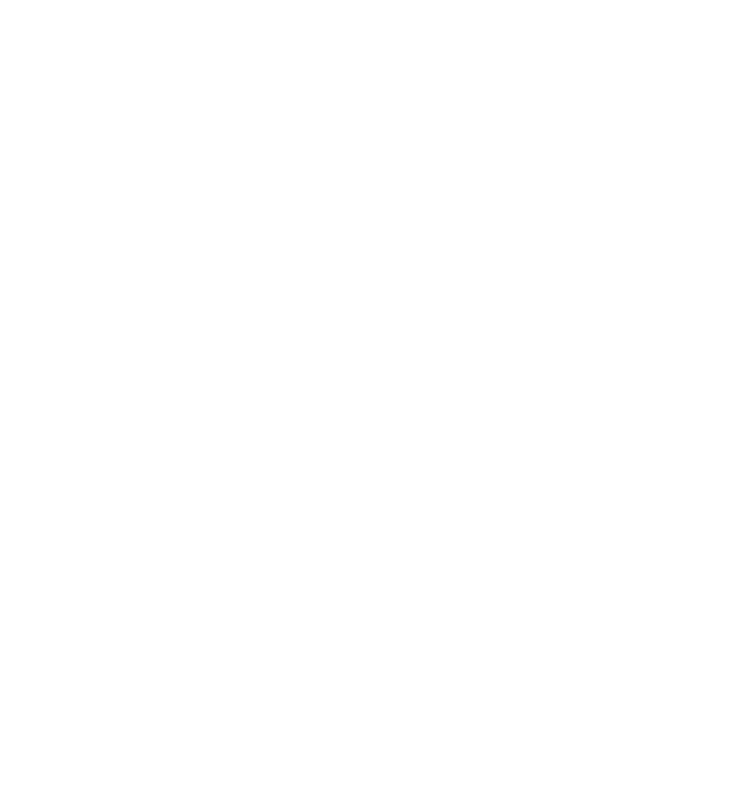

In [511]:
# video_path = Path("output/me_iu.mp4")
# video_frames = morph.compute_morph_video(me, iu, me_pts, iu_pts, video_path, num_frames=20, fps=10)

## Bells and Whistles

In [532]:
import utils, morph

In [533]:
%matplotlib tk
if not Path("input/im_ugly.pkl").exists():
    other_pts = utils.pick_points("input/im_ugly.jpg", NUM_POINTS)
    utils.save_points(other_pts, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")
assert len(other_pts) == NUM_POINTS + 4, len(other_pts)

In [534]:
utils.save_points(tmp, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer

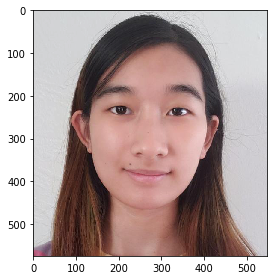

In [535]:
io.imshow(me)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer

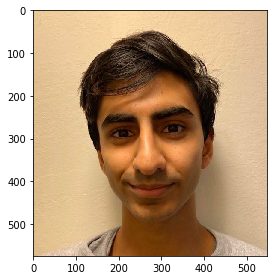

In [536]:
other = utils.to_img_arr("input/im_ugly.jpg")
io.imshow(other)

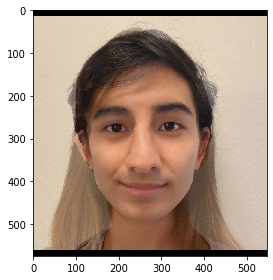

In [542]:
%matplotlib inline
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, other, me_pts, other_pts, alpha=0.5)
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
other_warped = morph.warp_img(other, other_pts, mid_pts, triangulation)
io.imshow(middle_img)

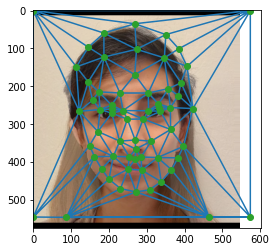

In [543]:
morph.plot_tri_mesh(middle_img, mid_pts, triangulation)

In [544]:
# video_path = Path("output/bells.mp4")
# video_frames = morph.compute_morph_video(
#     me, other, me_pts, other_pts, video_path, num_frames=80, fps=25, boomerang=False
# )

# Population Mean

## Me, IU and Other

In [546]:
pop_imgs = [iu, me, other]
pop_pts = [iu_pts, me_pts, other_pts]
mean_pts = np.mean(pop_pts, axis=0)
assert len(mean_pts) == 63

In [581]:
mean_img, mean_shape, triangulation, warped_imgs = pop.compute_population_mean(pop_imgs, pop_pts)

0.0 574.0 (63, 2)


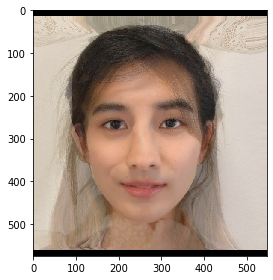

In [582]:
io.imshow(mean_img)

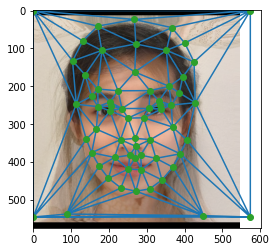

In [583]:
morph.plot_tri_mesh(mean_img, mean_pts, triangulation)

## Danes

In [636]:
import population_mean as pop

In [637]:
from my_types import to_img_arr
import matplotlib.pyplot as plt
import utils
man = to_img_arr("imm_face_db/01-1m.jpg")
man_pts = utils.load_points_from_asf("imm_face_db/01-1m.asf", APPEND_CORNERS=True)
man.shape

(480, 640, 3)

In [638]:
pop_dir = Path("imm_face_db")

all_imgs = sorted(list(Path(pop_dir).glob("*-1*.jpg")))
all_pts = sorted(list(Path(pop_dir).glob("*-1*.asf")))

male_imgs = sorted(list(Path(pop_dir).glob("*-1m.jpg")))
male_pts = sorted(list(Path(pop_dir).glob("*-1m.asf")))

female_imgs = list(Path(pop_dir).glob("*-1f.jpg"))
female_pts = list(Path(pop_dir).glob("*-1f.asf"))

In [640]:
man = my_types.to_img_arr("imm_face_db/01-1m.jpg")
man_pts = my_types.to_points("imm_face_db/01-1m.asf")
man_pts.shape
# assert man_pts.shape[1] == 2
# print(man_pts)
# print(pop.fix_pop_pts(man_pts))
man_pts = pop.fix_pop_pts(man_pts)
# utils.plot_points(man, pop.fix_pop_pts(man_pts))
# triangulation = morph.delaunay(man_pts)

(58, 2)
(62, 2)


In [641]:
len(man_pts)

62

In [642]:
pop.fix_pop_pts(man_pts)

(62, 2)
(66, 2)


array([[147635.663616, 146487.742464],
       [157232.441088, 148552.257536],
       [168067.501056, 153507.10272 ],
       [179831.291904, 163416.772608],
       [188189.773056, 172913.549312],
       [195309.955584, 188190.96576 ],
       [196857.819648, 200990.96576 ],
       [193452.512256, 219984.523264],
       [186641.908992, 231132.909568],
       [177973.846272, 238565.163008],
       [167757.935616, 244758.716416],
       [159089.88672 , 248887.742464],
       [149802.690816, 251778.076672],
       [116987.91552 , 239390.96576 ],
       [113582.612736, 233197.412352],
       [112344.316416, 226590.96576 ],
       [112963.465728, 217507.10272 ],
       [116678.347776, 214203.88352 ],
       [117916.630272, 221636.132864],
       [118845.358848, 227829.686272],
       [118845.358848, 234436.132864],
       [116368.766208, 160939.35616 ],
       [112653.891072, 168371.617792],
       [110796.452352, 176216.772608],
       [113273.040384, 183649.03424 ],
       [116368.766208, 19

In [ ]:
mean_img, mean_shape, triangulation, warped_imgs = pop.compute_population_mean(all_imgs, all_pts, NEED_FIX=True)
io.imshow(mean_img)
# io.imshow()

(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
(58, 2)
(62, 2)
0.0 639.0 (62, 2)


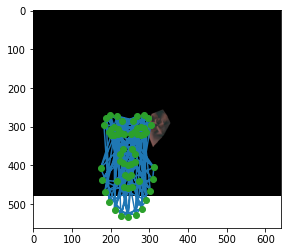

In [181]:
morph.plot_tri_mesh(mean_img, mean_pts, triangulation)